In [122]:
#Import the Dataset
import pandas as pd
problem_description = open("Iris.Names")
print(problem_description.read())
data = pd.read_csv("Iris.Data", delimiter = ",",header = None)
print(data)

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

In [123]:
#Clean the Dataset

#Define column names
data.columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"]
train_columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width" ]

#Make Class labels look better
classlabelmap = {"Iris-setosa" : "Setosa", "Iris-virginica" : "Virginica", "Iris-versicolor" : "Versicolor"}
data["Class"] = data["Class"].apply(lambda x : classlabelmap.get(x))

#Create new boolean columns for each class
classtypes = ["Setosa", "Virginica", "Versicolor"]
for classtype in classtypes : 
    data[classtype] = data["Class"].apply(lambda x : x == classtype )
    
print(data)

     Sepal Length  Sepal Width  Petal Length  Petal Width      Class  Setosa  \
0             5.1          3.5           1.4          0.2     Setosa    True   
1             4.9          3.0           1.4          0.2     Setosa    True   
2             4.7          3.2           1.3          0.2     Setosa    True   
3             4.6          3.1           1.5          0.2     Setosa    True   
4             5.0          3.6           1.4          0.2     Setosa    True   
..            ...          ...           ...          ...        ...     ...   
145           6.7          3.0           5.2          2.3  Virginica   False   
146           6.3          2.5           5.0          1.9  Virginica   False   
147           6.5          3.0           5.2          2.0  Virginica   False   
148           6.2          3.4           5.4          2.3  Virginica   False   
149           5.9          3.0           5.1          1.8  Virginica   False   

     Virginica  Versicolor  
0        F

In [124]:
#Split it into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state = 10)

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,0.708168,-0.042134,1.304739,0.527000
Sepal Width,-0.042134,0.186216,-0.330754,-0.120870
Petal Length,1.304739,-0.330754,3.185375,1.329987
Petal Width,0.527000,-0.120870,1.329987,0.602632


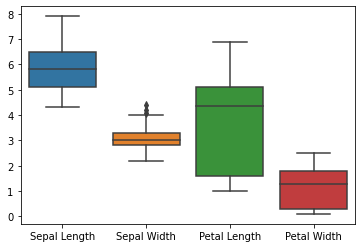

<Figure size 432x288 with 0 Axes>

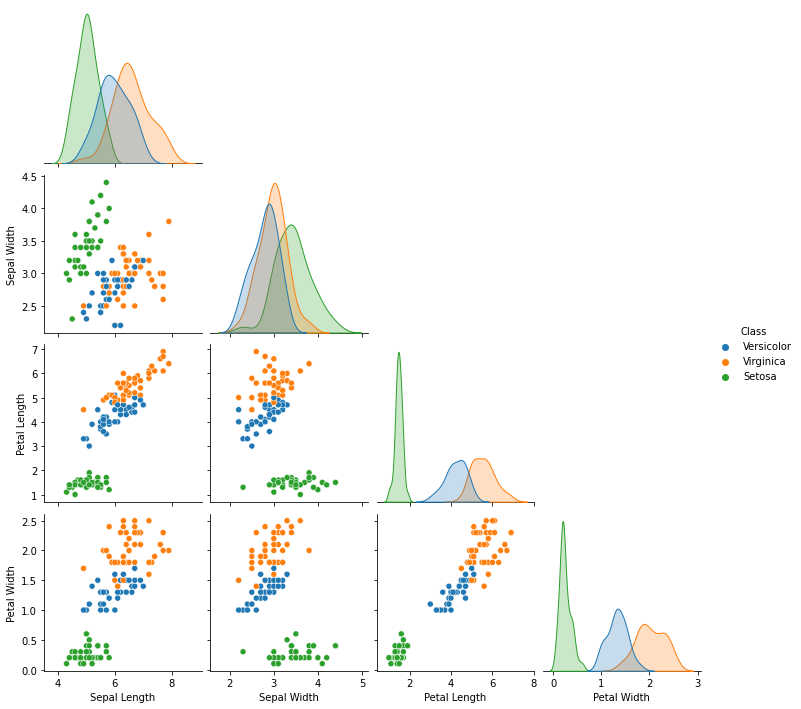

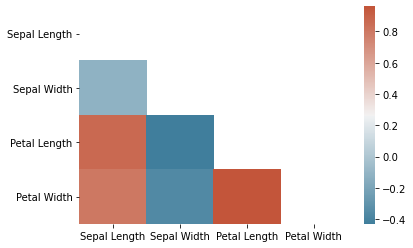

In [125]:
#Visualize the Dataset
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plot_train = train.drop(classtypes,axis = 1)

plt.figure()
sns.boxplot(data = plot_train[train_columns])


corr = plot_train.corr()

def plot_variance(df) :
    plt.figure()
    corr = df.corr()
    heatmap = sns.heatmap(corr, cmap = sns.diverging_palette(230, 20, as_cmap=True), mask = np.triu(np.ones_like(corr, dtype=bool)))


plt.figure()
sns.pairplot(plot_train, hue = "Class",corner = True )

plot_variance(plot_train)
plot_train.cov()



In [126]:
from sklearn import svm

setosa_classifier = svm.SVC(kernel = "linear", C = 1000)
setosa_classifier.fit(train[["Petal Width", "Petal Length"]], train["Setosa"])
print(setosa_classifier.support_vectors_)

[[1.1 3. ]
 [0.4 1.9]]


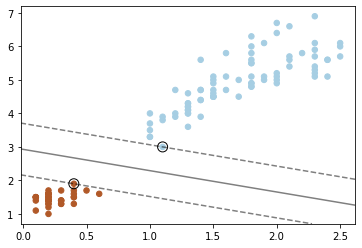

In [127]:
#Plot the SVM decision function

import matplotlib.pyplot as plt

def Plot_SVM(X, Y, Output, Classifier) : 
    plt.scatter(X, Y, c=Output, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = Classifier.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    ax.scatter(Classifier.support_vectors_[:, 0], Classifier.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()
    
Plot_SVM(train["Petal Width"], train["Petal Length"], train["Setosa"], setosa_classifier)

In [128]:
#Fit a Logistic Regression Model to classify Virginica and Versicolor

from sklearn.linear_model import LogisticRegression
from statistics import mean

train_nonsetosa = train[train["Setosa"] == False]
train_nonsetosa = train_nonsetosa.reset_index(drop = True)
virginica_predictor_1 = LogisticRegression()
virginica_predictor_1.fit(train_nonsetosa[train_columns], train_nonsetosa["Virginica"])
mean(virginica_predictor_1.predict(train_nonsetosa[train_columns]) == train_nonsetosa["Virginica"])


0.95

<AxesSubplot:title={'center':'Versicolor'}>

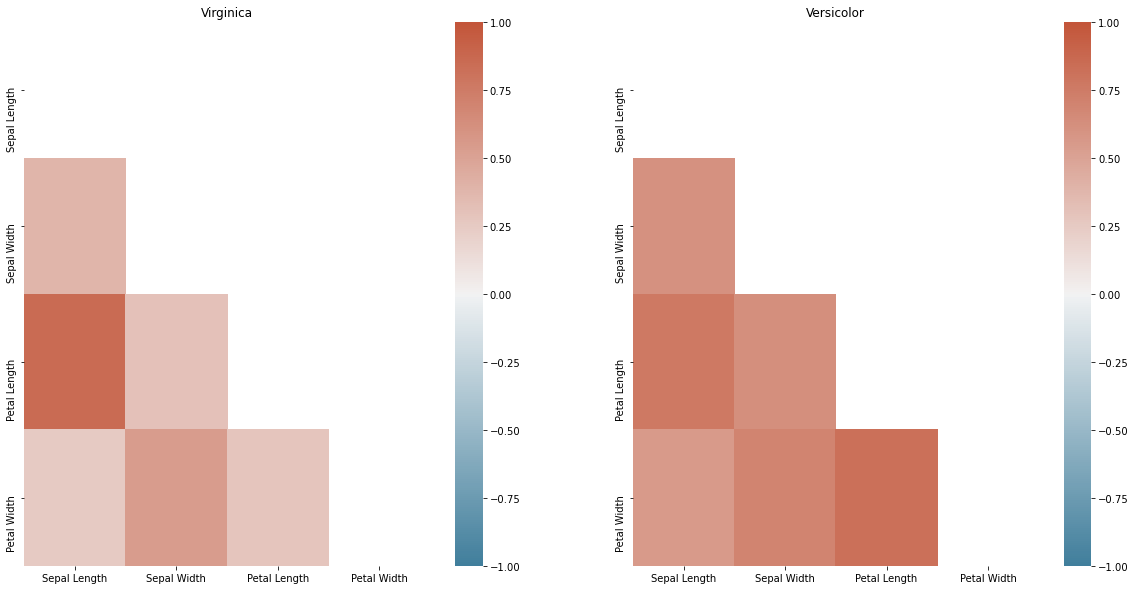

In [129]:
#Analyse if a Linear Discriminant Analysis or a Quadratic Discriminant Analysis
#would be a better fit than the Logistic model fitted above

train_virginica = train_nonsetosa[train_nonsetosa["Virginica"] == True]
train_versicolor = train_nonsetosa[train_nonsetosa["Versicolor"] == True]

#sns.pairplot(train_virginica[train_columns + ["Virginica"]], hue = "Virginica")
#train_virginica[train_columns].cov()
#sns.pairplot(train_versicolor[train_columns + ["Versicolor"]], hue = "Versicolor")
#train_versicolor[train_columns].cov()



plot_nonsetosa = train_nonsetosa
plot_nonsetosa = plot_nonsetosa.melt(id_vars = ["Class"], value_vars = train_columns, var_name = "Feature")


#grid1 = sns.FacetGrid(plot_nonsetosa, col = "Feature", row = "Class", margin_titles = True)
#grid1.map_dataframe(sns.kdeplot)


#plt.figure()

plot_nonsetosa = train_nonsetosa[train_columns + ["Class"]]
virginica_corr = plot_nonsetosa[plot_nonsetosa["Class"] == "Virginica"].corr()
versicolor_corr = plot_nonsetosa[plot_nonsetosa["Class"] == "Versicolor"].corr()
fig, ax =plt.subplots(1,2,figsize = (20,10))
ax[0].set_title("Virginica")
ax[1].set_title("Versicolor")
sns.heatmap(virginica_corr, vmin = -1, vmax = 1, cmap = sns.diverging_palette(230, 20, as_cmap=True), mask = np.triu(np.ones_like(virginica_corr, dtype=bool)),ax=ax[0])
sns.heatmap(versicolor_corr, vmin = -1, vmax = 1, cmap = sns.diverging_palette(230, 20, as_cmap=True), mask = np.triu(np.ones_like(versicolor_corr, dtype=bool)),ax=ax[1])



In [130]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
virginica_predictor_2 = QuadraticDiscriminantAnalysis()
train_nonsetosa
virginica_predictor_2.fit(train_nonsetosa[train_columns], train_nonsetosa["Virginica"])
mean(virginica_predictor_2.predict(train_nonsetosa[train_columns]) == train_nonsetosa["Virginica"])

0.9625

[0.83225456]
0.975


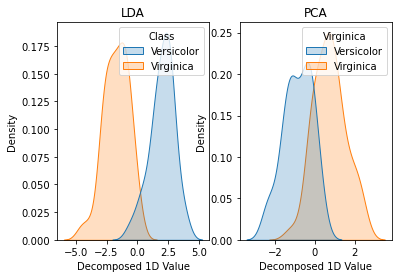

In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#First PCA
decompose_nonsetosa = PCA(n_components = 1)
decompose_nonsetosa.fit(train_nonsetosa[train_columns])
print(decompose_nonsetosa.explained_variance_ratio_)
projected_values_1 = pd.DataFrame(decompose_nonsetosa.transform(train_nonsetosa[train_columns]))
projected_values_1.columns = ["Decomposed 1D Value"]
projected_values_1["Virginica"] = train_nonsetosa["Class"]

#Now try LDA
virginica_predictor_3 = LinearDiscriminantAnalysis()
virginica_predictor_3.fit(train_nonsetosa[train_columns], train_nonsetosa["Virginica"])
print(mean(virginica_predictor_3.predict(train_nonsetosa[train_columns]) == train_nonsetosa["Virginica"]))
projected_values_2 = (virginica_predictor_3.transform(train_nonsetosa[train_columns]))
projected_values_2 = (pd.DataFrame(projected_values_2))
projected_values_2["Virginica"] = (train_nonsetosa["Class"])
projected_values_2.columns = ["Decomposed 1D Value", "Class"]
#print(projected_values)
fig, ax = plt.subplots(1,2)
ax[0].set_title("LDA")
ax[1].set_title("PCA")
sns.kdeplot(data = projected_values_2, x = "Decomposed 1D Value", hue = "Class", shade = True, ax = ax[0])
sns.kdeplot(data = projected_values_1, x = "Decomposed 1D Value", hue = "Virginica", shade = True, ax = ax[1])
plt.show()

In [132]:
#Let us also try fitting a SVM and see it's performance

from sklearn import svm
virginica_predictor_4 = svm.SVC(kernel = "linear", C=2)
virginica_predictor_4.fit(train_nonsetosa[train_columns], train_nonsetosa["Virginica"])
print(mean(virginica_predictor_4.predict(train_nonsetosa[train_columns]) == train_nonsetosa["Virginica"]))


0.975


In [133]:
#Compare all the 4 models for Classifying Virginica 

from sklearn.model_selection import cross_val_score

virginica_models = [virginica_predictor_1, virginica_predictor_2, virginica_predictor_3, virginica_predictor_4]

for model in virginica_models :
    score = cross_val_score(model, train_nonsetosa[train_columns], train_nonsetosa["Virginica"], cv = 10)
    score = np.mean(score)
    print("5-Fold Cross Validation Score for ", model, " is ", score)



5-Fold Cross Validation Score for  LogisticRegression()  is  0.95
5-Fold Cross Validation Score for  QuadraticDiscriminantAnalysis()  is  0.9375
5-Fold Cross Validation Score for  LinearDiscriminantAnalysis()  is  0.9625
5-Fold Cross Validation Score for  SVC(C=2, kernel='linear')  is  0.9625


In [157]:
#Build the final model

def IrisClassifier(X):
    X = X[train_columns]
    X["Setosa"] = setosa_classifier.predict(X[["Petal Width", "Petal Length"]])
    X["Virginica"] = virginica_predictor_3.predict(X[train_columns])
    X["Versicolor"] = ~X["Virginica"]
    X["Class"] = np.select([X["Setosa"], X["Virginica"], X["Versicolor"]], ["Setosa", "Virginica", "Versicolor"])
    return X

In [161]:
#Check performance of final model on train data
np.mean(IrisClassifier(train[train_columns])["Class"]==train["Class"])

0.9833333333333333

In [162]:
#Now Test it on the Test Data
np.mean(IrisClassifier(test[train_columns])["Class"]==test["Class"])

0.9666666666666667